# Decision Tree Practice

In [22]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import tree

In [2]:
# Grabbing our data, then exploring it a bit
# Data source: https://www.kaggle.com/ronitf/heart-disease-uci
df = pd.read_csv("heart.csv")

# EDA

# Modeling 

## Logistic Regression

### Preprocessing

What kind of preprocessing steps are there?
- Imputing
- Scaling
- Encoding

### Logistic Regression Model

In [62]:
# Lets set up a Logistic Regression Pipeline

In [ ]:
# Lets fit the LogReg on our training and calculate our roc_auc_scores

How'd we do?

### Decision Trees

#### let's do a basic decision tree with just the default values

In [ ]:
# Fit the model and lets see the tree

In [61]:
# Lets calculate the roc_auc_score


#### A simple decision tree with a single split

In [59]:
# lets set up the Decision Tree with a single split

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(279.0, 453.0, 'X[12] <= 2.5\ngini = 0.496\nsamples = 227\nvalue = [103, 124]'),
 Text(139.5, 271.8, 'X[2] <= 0.5\ngini = 0.368\nsamples = 136\nvalue = [33, 103]'),
 Text(69.75, 90.59999999999997, 'gini = 0.5\nsamples = 48\nvalue = [24, 24]'),
 Text(209.25, 90.59999999999997, 'gini = 0.184\nsamples = 88\nvalue = [9, 79]'),
 Text(418.5, 271.8, 'X[9] <= 0.85\ngini = 0.355\nsamples = 91\nvalue = [70, 21]'),
 Text(348.75, 90.59999999999997, 'gini = 0.5\nsamples = 35\nvalue = [18, 17]'),
 Text(488.25, 90.59999999999997, 'gini = 0.133\nsamples = 56\nvalue = [52, 4]')]

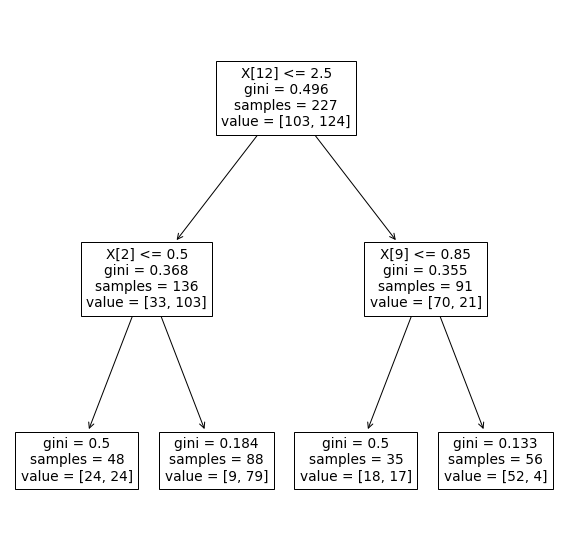

In [46]:
# Visualizing the single-split decision tree
# plot_tree(dt_maxdepth2, used_cols)
plt.figure(figsize=(10,10))
tree.plot_tree(dt_maxdepth2)

### Try something Random!

In [ ]:
# Okay - time to change things!
# Replace None with relevant code
dt_2 = DecisionTreeClassifier(max_depth= None, criterion=None, 
                              min_samples_split=None)

dt_2.fit(X_train, y_train)

plt.figure(figsize=(20,20))
tree.plot_tree(dt_2)

In [ ]:
train_preds = dt_2.predict_proba(X_train)
test_preds = dt_2.predict_proba(X_test)

train_score = roc_auc_score(y_train, train_preds[:,1])
test_score = roc_auc_score(y_test, test_preds[:,1])

print(f"Train ROC-AUC: {train_score}")
print(f"Test ROC-AUC: {test_score}")

## [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Lets start by taking a look at the documentation

# Vizualizing all the models scores

NameError: name 'dt_2' is not defined

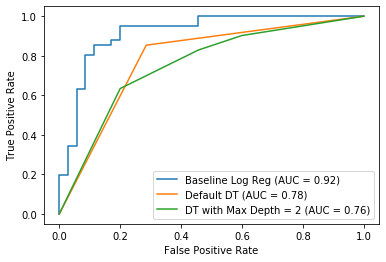

In [58]:
# Visualizing the ROCs for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(pipe_lr, X_test, y_test, name="Baseline Log Reg", ax=ax)
plot_roc_curve(dt, X_test, y_test, name="Default DT", ax=ax)
plot_roc_curve(dt_maxdepth1, X_test, y_test, name="DT with Max Depth = 1", ax=ax)
plot_roc_curve(dt_maxdepth2, X_test, y_test, name="DT with Max Depth = 2", ax=ax)
plot_roc_curve(dt_2, X_test, y_test, name="DT with Hyper Parameters", ax=ax)
plot_roc_curve(dt_grid, X_test, y_test, name="DT after Grid Search", ax=ax)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
ax.legend()
plt.show()

What can we learn from this visualization? Which is the best model - and how could you tell without looking at the scores?

- Baseline is still best - from both the visualization (closest to the '1' corner) and from the score

